### Factbook Database from CIA

https://github.com/factbook/factbook.sql

```
CREATE TABLE "facts" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
  "code" varchar(255) NOT NULL,
  "name" varchar(255) NOT NULL,
  
  ---------------------------------------
  -- Geography
  "area"       integer,
  "area_land"  integer,
  "area_water" integer,
  
  ----------------------------------------
  -- People and Society
  "population"        integer,
  "population_growth" float,
  "birth_rate"        float,
  "death_rate"        float,
  "migration_rate"    float,
  
  --------------------------------
  -- Timestamp
  "created_at" datetime,
  "updated_at" datetime
)
```

### SELECT / WHERE

```
SELECT column_name(s)
FROM table_name
WHERE condition AND|OR condition
```

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
facts = pd.read_sql_query("SELECT * FROM facts;",conn)
facts.head(5)

### Αριθμός γραμμών

In [ ]:
facts.shape

### Ερώτημα με συγκεκριμένες στήλες

```
SELECT name, population 
FROM facts
```

In [ ]:
facts = pd.read_sql_query("SELECT name, population FROM facts;",conn)
facts.head(5)

### Ή με συγκεκριμένες γραμμές

```
SELECT name, population 
FROM facts 
WHERE population > 50000000
```

In [ ]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population > 50000000;",conn)

```
SELECT name, population 
FROM facts 
WHERE population BETWEEN 10000000 AND 20000000
```

In [ ]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population BETWEEN 10000000 AND 20000000;",conn)

```
SELECT name, population 
FROM facts 
WHERE population IN (16955536,13975834,12042910)
```

In [ ]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population IN (16955536,13975834,12042910) ;",conn)

```
SELECT name, population 
FROM facts 
WHERE name LIKE '%reec%'
```

In [ ]:
pd.read_sql_query("SELECT name, population FROM facts WHERE name LIKE '%reec%' ;",conn)

### COUNT, MIN, MAX, SUM, AVG

```
SELECT COUNT(*) as TotalCountries 
FROM facts;
```

In [ ]:
pd.read_sql_query("SELECT COUNT(*) as TotalCountries FROM facts;",conn)

```
SELECT name, MIN(population) As population 
FROM facts
```

In [ ]:
pd.read_sql_query("SELECT name, MIN(population) As population FROM facts;",conn)

```
SELECT SUM(population) As TotalPopulation 
FROM facts
```

In [ ]:
pd.read_sql_query("SELECT SUM(population) As TotalPopulation FROM facts;",conn)

```
SELECT name, MAX(population) as population FROM facts
```

In [ ]:
pd.read_sql_query("SELECT name, MAX(population) as population FROM facts;",conn)

```
SELECT SUM(population) As TotalPopulation 
FROM facts 
WHERE name NOT IN ('World', 'European Union')
```

In [ ]:
pd.read_sql_query("SELECT SUM(population) As TotalPopulation FROM facts WHERE name NOT IN ('World', 'European Union');",conn)

```
SELECT AVG(population) 
FROM facts
```

In [ ]:
pd.read_sql_query("SELECT AVG(population) FROM facts;",conn)

### LIMIT

```
SELECT column_name(s)
FROM table_name
WHERE condition AND|OR condition
LIMIT integer
```

In [ ]:
pd.read_sql_query("SELECT name, population FROM facts LIMIT 10;",conn)

### ORDER BY

```
SELECT column_name(s)
FROM table_name
WHERE condition AND|OR condition
ORDER BY column_name [ASC|DESC]
```

In [ ]:
pd.read_sql_query("SELECT name, population FROM facts ORDER BY population ASC;",conn)
facts.head(30)

```
SELECT name, population 
FROM facts 
WHERE population > 50000000 AND name != 'World' 
ORDER BY population DESC
```

In [ ]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population > 50000000 AND name != 'World' ORDER BY population DESC;",conn)

### DISTINCT

```
SELECT DISTINCT(column_name)
FROM table_name
WHERE condition AND|OR condition
```


In [ ]:
pd.read_sql_query("SELECT DISTINCT(population_growth) FROM facts;",conn)

```
SELECT COUNT(DISTINCT(population_growth)) 
FROM facts
```

In [ ]:
pd.read_sql_query("SELECT COUNT(DISTINCT(population_growth)) FROM facts;",conn)

### Πράξεις

```
SELECT name, population/1000 
FROM facts
```

In [ ]:
pd.read_sql_query("SELECT name, population/1000 FROM facts;",conn)

```
SELECT name, area, area_water, area_land, area_water + area_land 
FROM facts
```

In [ ]:
pd.read_sql_query("SELECT name, area, area_water, area_land, area_water + area_land FROM facts;", conn)

In [ ]:
conn.close()

## Chinook database

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("chinook.db",isolation_level=None)
chinook = pd.read_sql_query("SELECT * FROM tracks;",conn)
chinook.head(5)

In [ ]:
chinook = pd.read_sql_query("SELECT * FROM customers;",conn)
chinook.head(5)

### GROUP BY

```
SELECT column_name, aggregate_function(column_name)
FROM table_name
WHERE column_name operator value
GROUP BY column_name
HAVING aggregate_function operator value
```

In [ ]:
pd.read_sql_query("SELECT Country, COUNT(*) FROM customers GROUP BY Country;",conn)

```
SELECT Country, State, Count(*) 
FROM customers 
WHERE Country = 'Canada' 
GROUP BY State
```

In [ ]:
pd.read_sql_query("SELECT Country, State, Count(*) FROM customers WHERE Country = 'Canada' GROUP BY State;",conn)

```
SELECT Country, COUNT(*) 
FROM customers 
GROUP BY Country 
HAVING COUNT(*) > 2
```

In [ ]:
pd.read_sql_query("SELECT Country, COUNT(*) FROM customers GROUP BY Country HAVING COUNT(*) > 2;",conn)

### JOINS

* (INNER) JOIN: Returns records that have matching values in both tables
* LEFT (OUTER) JOIN: Return all records from the left table, and the matched records from the right table
* RIGHT (OUTER) JOIN: Return all records from the right table, and the matched records from the left table
* FULL (OUTER) JOIN: Return all records when there is a match in either left or right table

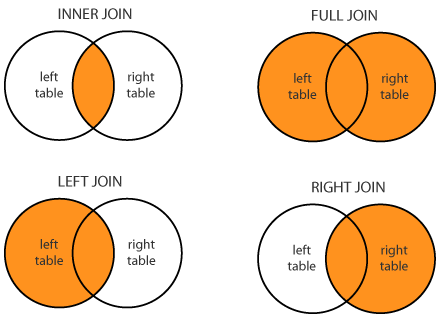

In [ ]:
pd.read_sql_query("SELECT * FROM tracks LIMIT 10;",conn)

In [ ]:
pd.read_sql_query("SELECT *  FROM genres;",conn)

```
SELECT tracks.Name, genres.Name 
FROM tracks 
INNER JOIN genres ON tracks.GenreId = genres.GenreId
```

In [ ]:
pd.read_sql_query("SELECT tracks.Name, genres.Name FROM tracks INNER JOIN genres ON tracks.GenreId = genres.GenreId;", conn)

```
SELECT genreid, COUNT(*) 
FROM tracks 
GROUP BY genreid
```

In [ ]:
pd.read_sql_query("SELECT genreid, COUNT(*) FROM tracks GROUP BY genreid;",conn)

### INSERT

```
INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);
```

In [ ]:
conn.execute("INSERT INTO genres (GenreId, Name) VALUES (27,'laika2')")

In [ ]:
pd.read_sql_query("SELECT *  FROM genres;",conn)

### NULL

```
SELECT * 
FROM customers 
WHERE Fax IS NULL
```

In [ ]:
res = pd.read_sql_query("SELECT * FROM customers WHERE Fax IS NULL",conn)
res.head(5)

```
SELECT * 
FROM customers 
WHERE Fax IS NOT NULL
```

In [ ]:
res = pd.read_sql_query("SELECT * FROM customers WHERE Fax IS NOT NULL",conn)
res.head(5)

### UPDATE

```
UPDATE table_name
SET column1 = value1, column2 = value2, ...
WHERE condition;
```

In [ ]:
conn.execute("UPDATE customers SET Fax = -1 WHERE Fax IS NULL")

In [ ]:
pd.read_sql_query("SELECT * FROM customers WHERE Fax IS NULL",conn)

### DELETE

```
DELETE FROM table_name
WHERE condition;
```

In [ ]:
conn.execute("DELETE FROM customers WHERE Fax = -1")

In [ ]:
pd.read_sql_query("SELECT * FROM customers WHERE Fax = -1",conn)

### DATETIME

```
SELECT strftime('%Y', BirthDate), LastName 
FROM employees
```

In [ ]:
pd.read_sql_query("SELECT * FROM employees",conn)

In [ ]:
pd.read_sql_query("SELECT strftime('%Y', BirthDate) As YearOfBirth, LastName FROM employees",conn)

### Άσκηση

Να βρεθούν οι συνολικές πωλήσεις δίσκων ανά χρονιά, όπου το αποτέλεσμα θα είναι σαν την εικόνα

![alt text](ex1.png "Title")

### Άσκηση

Να βρεθούν τα 20 τραγούδια με τις περισσότερες πωλήσεις (και πόσες ήταν αυτές)

### IF - ELSE

```
CASE case_expression
     WHEN when_expression_1 THEN result_1
     WHEN when_expression_2 THEN result_2
     ...
     [ ELSE result_else ] 
END
```

```
SELECT CASE 
        WHEN strftime('%m', invoiceDate) = '01' THEN 'January' 
        WHEN strftime('%m', invoiceDate) = '02' THEN 'February' 
        ELSE '...' 
       END AS Month, 
       invoiceDate 
FROM invoices
```

In [ ]:
pd.read_sql_query("SELECT CASE WHEN strftime('%m', invoiceDate) = '01' THEN 'January' WHEN strftime('%m', invoiceDate) = '02' THEN 'February' ELSE '...' END AS Month, invoiceDate FROM invoices",conn)

```
SELECT SUM(CASE 
            WHEN strftime('%m', invoiceDate) = '01' THEN 1 
            ELSE 0 
           END) AS January, 
        SUM(CASE 
            WHEN strftime('%m', invoiceDate) = '02' THEN 1 
            ELSE 0 
        END) AS February
FROM invoices
```

In [ ]:
pd.read_sql_query("SELECT SUM(CASE WHEN strftime('%m', invoiceDate) = '01' THEN 1 ELSE 0 END) AS January, SUM(CASE WHEN strftime('%m', invoiceDate) = '02' THEN 1 ELSE 0 END) AS February FROM invoices",conn)